# Tasca M3 T02

In [132]:
import numpy as np
import pandas as pd
import random
import math

## Exercici 1
Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un Pandas Dataframe. Explora les dades que conté, explica breument quines variables hi ha i queda’t únicament amb les columnes que consideris rellevants. Justifica la teva elecció.


[->Airlines Delay: Airline on-time statistics and delay causes](https://www.kaggle.com/datasets/giovamata/airlinedelaycauses)

**❗ Important**

Redueix la dimensió del dataset de manera aleatòria per tal d'obtenir un dataset de només 200.000 registres. Tots els exercicis s'han de fer amb aquest dataset reduït.

In [133]:
df = pd.read_csv("DelayedFlights.csv").sample(n=200000)
print(df.columns)

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


Variable descriptions: Name Description 1 Year 1987-2008 2 Month 1-12 3 DayofMonth 1-31 4 DayOfWeek 1 (Monday) - 7 (Sunday) 5 DepTime actual departure time (local, hhm m) 6 CRSDepTime scheduled departure time (local, hhmm) 7 ArrTime actual arrival time (local, hhmm) 8 CRSArrTime scheduled arrival time (local, hhmm) 9 UniqueCarrier unique carrier code 10 FlightNum flight number 11 TailNum plane tail number 12 ActualElapsedTime in minutes 13 CRSElapsedTime in minutes 14 AirTime in minutes 15 ArrDelay arrival delay, in minutes 16 DepDelay departure delay, in minutes 17 Origin origin IATA airport code 18 Dest des tination IATA airport code 19 Distance in miles 20 TaxiIn taxi in time, in minutes 21 TaxiOut taxi out time in minutes 22 Cancelled was the flight cancelled? 23 CancellationCode reason for cancellation (A = carrier, B = weather, C = NAS, D = security) 24 Diverted 1 = yes, 0 = no 25 CarrierDelay in minutes 26 WeatherDelay in minutes 27 NASDelay in minutes 28 SecurityDelay in minutes 29 LateAircraftDelay in minutes

### Columnas relevantes:
> 'Month': Mes del año. 

> 'DayofMonth': Día del año.

> 'DayOfWeek': Día de la semana.

> 'UniqueCarrier': Aerolinea que gestiona el vuelo

> 'ActualElapsedTime': Tiempo de vuelo real

> 'CRSElapsedTime': Tiempo de vuelo estimado

> 'AirTime': Tiempo en el aire

> 'ArrDelay': Tiempo de retraso

> 'DepDelay': Retraso respecto a la salida planificada

> 'Origin': Lugar de salida

> 'Dest': Lugar de destino







### Columnas no relevantes:

> 'Year': Año del vuelo. El dataset completo es el del año 2008

> 'FlightNum': Numero de vuelo. No aporta valor al analisis.

> 'TailNum': Matricula del avión. No aporta valor al analisis. 


*Las siguientes variables no nos harán falta porque el los tiempos de retraso ya estan calculados, y porque en este caso en concreto, no vamos ha realizar un analisis estadistico respecto a horas de llegada y de salida, ni vamos a tener en cuenta los tiempos de rodaje.*

> 'DepTime': Hora de salida

> 'CRSDepTime': Hora de salida planificada

> 'ArrTime': Hora de llegada

> 'CRSArrTime': Hora de llegada planificada

> 'TaxiIn': Tiempo de rodaje sobre pista antes de salir.

> 'TaxiOut': Tiempo de rodaje al llegar al destino.

*No son relevantes para el analisis actual y la solución del ejercicio 2 pero antes de eliminar las columnas 'Cancelled' y 'Diverted' nos aseguraremos de eliminar las filas que donde los vuelos fueron cancelados y desviados*

> 'Cancelled': Vuelo cancelado?

> 'CancellationCode': Razon de cancelación

> 'Diverted': Vuelo desviado?



*Los motivos de los retrasos no son relevantes para el analisis actual*

> 'CarrierDelay': Retraso por motivos de la aerolinia

> 'WeatherDelay': Retraso por motivos meteorológicos

> 'NASDelay': Retraso por motivos del National Airspace System

> 'SecurityDelay':  Retraso por motivos de seguridad

> 'LateAircraftDelay':  Retraso por motivos del vuelo anterior



In [134]:
# Adaptamos el DataFrame a las columnas relevantes
# pero primero eliminamos las filas que 'Cancelled' = 1 y las filas que 'Diverted' = 1

df = df[(df.Cancelled == 0)]
df = df[(df.Diverted == 0)]
#print(df.Cancelled.value_counts())
#print(df.Diverted.value_counts())


df = df.drop(columns=['Year', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'FlightNum', 'TailNum', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'])
print(df.columns)
df.shape


Index(['Unnamed: 0', 'Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance'],
      dtype='object')


(199149, 13)

## Exercici 2
Fes un informe complet del dataset:

   * Resumeix estadísticament el dataset i les columnes d’interès. Fes una anàlisi estadístic del que consideris rellevant.
   * Troba quantes dades faltants hi ha per columna.
   * Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...).
   * Fes una taula de les aerolínies amb més endarreriments acumulats.
   * Quins són els vols més llargs? I els més endarrerits? Busca les rutes més llargues i les que acumulen més retards.
   * Aporta allò que consideris rellevant.



In [135]:
#Resumeix estadísticament el dataset i les columnes d’interès. Fes una anàlisi estadístic del que consideris rellevant.
print("Datos estadisticos mas relevantes:")
print(df[['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay','DepDelay', 'Distance']].describe())
print("Numero de vuelos por compañia:")
print(df.UniqueCarrier.value_counts())
print("Matriz de correlacion entre los datos")
df.corr()
print(f"Distancia media recorrida: {df.Distance.mean()}")
print(f"El mes con mas vuelos: {df.Month.value_counts().idxmax()}")
print(f"El día de la semana con menos vuelos: {df.DayOfWeek.value_counts().idxmin()}")


Datos estadisticos mas relevantes:
       ActualElapsedTime  CRSElapsedTime        AirTime       ArrDelay  \
count      199149.000000   199149.000000  199149.000000  199149.000000   
mean          133.320037      134.227277     108.291977      42.182481   
std            71.909741       71.121010      68.501555      56.241019   
min            17.000000        2.000000       0.000000     -66.000000   
25%            80.000000       82.000000      58.000000       9.000000   
50%           116.000000      116.000000      90.000000      25.000000   
75%           165.000000      165.000000     137.000000      56.000000   
max           790.000000      660.000000     642.000000    1344.000000   

            DepDelay       Distance  
count  199149.000000  199149.000000  
mean       43.089722     765.155617  
std        52.772986     572.584155  
min         6.000000      11.000000  
25%        12.000000     341.000000  
50%        24.000000     606.000000  
75%        53.000000     998.000

In [136]:
#Troba quantes dades faltants hi ha per columna.

#print(df.info())
print(f"El numero de datos null es: {df.isnull().sum().sum()}")
print(f"El numero de datos na es: {df.isna().sum().sum()}")


El numero de datos null es: 0
El numero de datos na es: 0


In [137]:
#Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...).

df = df.drop(df[df['AirTime'] == 0].index)  #Eliminamos las filas con Tiempo de vuelo 0
df = df.drop(df[df['Distance'] == 0].index) #Eliminamos las filas con Distancia 0

df['v_media'] = df.apply(lambda row: row['Distance'] / row['AirTime'], axis= 1)

df.v_media.head()


159500     5.216216
937196     6.095238
1455865    6.864865
1593198    6.655172
1253527    8.550000
Name: v_media, dtype: float64

In [141]:
df['Tarde'] = df['ArrDelay'].apply(lambda x: 1 if x > 0 else 0)
df[['Tarde','ArrDelay']].head()


,Tarde,ArrDelay
159500,1,2.0
937196,1,5.0
1455865,0,0.0
1593198,1,5.0
1253527,1,3.0


In [147]:
# Fes una taula de les aerolínies amb més endarreriments acumulats.


df_retrasos = df.groupby(['UniqueCarrier'])['ArrDelay'].sum().reset_index(name = "Retraso")

df_retrasos.Retraso = df_retrasos.Retraso.astype(int) 

print("Las 10 compañias que más retrasos acumulan son las siguientes:")
print(df_retrasos.sort_values('Retraso', ascending=False).iloc[:10])



Las 10 compañias que más retrasos acumulan son las siguientes:
   UniqueCarrier  Retraso
17            WN  1160309
1             AA   906956
15            UA   686829
11            MQ   659297
14            OO   612021
18            XE   540638
6             DL   468195
5             CO   427262
7             EV   406279
19            YV   383780


In [144]:
#Quins són els vols més llargs? I els més endarrerits? Busca les rutes més llargues i les que acumulen més retards.

df_rutas = df[['Origin', 'Dest', 'Distance', 'ArrDelay']]

df_rutas_distancia = df_rutas.groupby(['Origin', 'Dest'])['Distance'].max().reset_index(name = "Distance")
print("Las 10 rutas mas largas son:")
print(df_rutas_distancia.sort_values('Distance', ascending=False).iloc[:10])

df_rutas_retraso = df_rutas.groupby(['Origin', 'Dest'])['ArrDelay'].sum().reset_index(name = "Tot_Retraso")
print("Las 10 rutas con mas retraso acumulado son:")
print(df_rutas_retraso.sort_values('Tot_Retraso', ascending=False).iloc[:10])





Las 10 rutas mas largas son:
     Origin Dest  Distance
1892    HNL  EWR      4962
1615    EWR  HNL      4962
1889    HNL  ATL      4502
189     ATL  HNL      4502
1902    HNL  ORD      4243
3460    ORD  HNL      4243
2341    KOA  ORD      4213
3497    ORD  OGG      4184
1899    HNL  MSP      3972
3158    MSP  HNL      3972
Las 10 rutas con mas retraso acumulado son:
     Origin Dest  Tot_Retraso
2513    LAX  SFO      24623.0
3475    ORD  LGA      23296.0
2586    LGA  ORD      22825.0
169     ATL  EWR      20619.0
1638    EWR  ORD      20580.0
3446    ORD  EWR      20198.0
208     ATL  LGA      19790.0
4272    SFO  LAX      18972.0
832     CLT  EWR      18271.0
2549    LGA  ATL      17718.0


## Exercici 3
Exporta el dataset net i amb les noves columnes a Excel.


In [148]:
df.to_excel("avioncitos.xlsx")
df.head()

,Unnamed: 0,Month,DayofMonth,DayOfWeek,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,v_media,Tarde
159500,517747,1,15,2,AA,52.0,65.0,37.0,2.0,15.0,MCO,MIA,193,5.216216,1
937196,3145413,6,28,6,YV,65.0,71.0,42.0,5.0,11.0,CLT,RIC,256,6.095238,1
1455865,4987587,9,18,4,OH,115.0,125.0,74.0,0.0,10.0,DTW,JFK,508,6.864865,0
1593198,5748626,10,22,3,MQ,135.0,140.0,116.0,5.0,10.0,DFW,GJT,772,6.655172,1
1253527,4194209,7,3,4,CO,321.0,326.0,300.0,3.0,8.0,SFO,EWR,2565,8.550000,1


<center><src="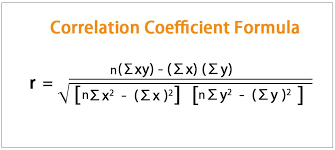"></center>
 